##  ARMP workflow setup for making AR peak day (seasonality) metrics
### Set config parameters
the customized config.in file should be like

In [45]:
import os

current_dir = os.getcwd()
config_file = os.path.join(current_dir, '../params/config.in')

with open(config_file) as f:
    print(f.read())


project_name = "ARMP demo project with dummmy data 11/11/2024"

# ======= basic ARMP workflow structure and dimension setting =======
json_structure = ("REF", "RESULTS",)  # frozen with ARMP version
layout = ("model", "ARDT", "region", "season",)  # frozen with ARMP version

season_list = ("NDJFM",)  # can be customized with season_month_list below
season_month_list = ([11, 12, 1, 2, 3],)

model_list = ("ERA5", "CanESM2",)
ARDT_list = ("Mundhenk",)
region_list = ("California",)  # custom region in params/region_def.py


# ======= input data specification =======
tag_var_list = ("binary_tag",)  # same length as ARDT_list
tag_freq_list = ("6h", "6h")  # AR data temporal resolution, same length as model_list
tag_var_out = "binary_tag"  # output AR variable
tag_var_fn = tag_var_out


include_clim = True  # analysis on climate data, e.g., precipitation, temperature

# ------- set section below if include_clim -------
clim_var_list = ("pr", "pr",)  # same length as model_list
clim_freq_list

### Specifically set 
`metric_peak_day = True`<br>
and optionally `diag_peak_day_histogram = True` for diagnostic histogram plot
<br>
<br>
## prepare for the input data
### Assuming we have small-sized dummy data for AR tags

In [46]:
!ls data/*tag*.nc

ls: data/*tag*.nc: No such file or directory


### prepare the data into a .in data list 
in `dir_in`, which is ARMP/data/ by default <br>
as `ERA5_Mundhenk_tag_list.in` 
and `CanESM_Mundhenk_tag_list.in`

In [47]:
!ls ../data/*tag_list.in
!cat {os.path.join(current_dir, '../data/ERA5_Mundhenk_tag_list.in')}

../data/CanESM2_Mundhenk_tag_list.in ../data/ERA5_Mundhenk_tag_list.in
doc/demo_data/AR_tag2_1997.nc
doc/demo_data/AR_tag2_1998.nc


### now we've got everything we need to run AR peak day metrics

In [48]:
%%bash
python ../driver_AR.py

2024-11-18 17:15:02,065 [WARNING]: bounds.py(create_bounds:931) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2024-11-18 17:15:02,065 [WARNING]: bounds.py(create_bounds:931) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
/Users/dong12/Pictures/ARMP_dev/v0.2/ARMP/ARMP/lib/sampling.py:82: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da["time"] = converted_times
2024-11-18 17:15:02,137 [WARNING]: bounds.py(create_bounds:931) >> The 'lat' coordinate variable is missing a 'units


################################################################################
    _    ____  __  __ ____
   / \  |  _ \|  \/  |  _ \
  / _ \ | |_) | |\/| | |_) |
 / ___ \|  _ <| |  | |  __/
/_/   \_\_| \_\_|  |_|_|

Welcome to Atmospheric River Metrics Package!  (Version: 0.1)

Job starts for ARMP demo project with dummmy data 11/11/2024
################################################################################
    
Job starts!
processing AR ---> ERA5, Mundhenk, California, NDJFM
processing AR ---> CanESM2, Mundhenk, California, NDJFM

calculating AR bias metrics on freq

calculating AR bias metrics on peak_day

calculating AR spatial correlation metrics

run app/ar_iou.py with user defined cases

starting to calculate metrics for AR related climate variables
processing pr ---> ERA5, Mundhenk, California, NDJFM
Converting units by  multiply 86400.0
processing pr ---> CanESM2, Mundhenk, California, NDJFM

calculating bias metrics for pr mean

ARMP_clim done!

custom and run gr

### checkout the output data in `output/` or user-defined output directory

In [49]:
!ls ../output/*_ts.nc

../output/CanESM2_Mundhenk_California_NDJFM_pr_pr_ts.nc
../output/CanESM2_Mundhenk_California_NDJFM_tag_occur_ts.nc
../output/CanESM2_Mundhenk_California_annual_pr_pr_ts.nc
../output/CanESM2_Mundhenk_California_annual_tag_occur_ts.nc
../output/ERA5_Mundhenk_California_NDJFM_pr_pr_ts.nc
../output/ERA5_Mundhenk_California_NDJFM_tag_occur_ts.nc
../output/ERA5_Mundhenk_California_annual_pr_pr_ts.nc
../output/ERA5_Mundhenk_California_annual_tag_occur_ts.nc


In [50]:
!ls ../output/*peak_day.json

../output/metric_peak_day.json


### metrics results are structured as defined in `config.in`

In [51]:
import json
with open ('../output/metric_peak_day.json') as f:
    metric_dict = json.load(f)
    print(json.dumps(metric_dict, indent=4))

{
    "REF": {},
    "RESULTS": {
        "ERA5": {
            "Mundhenk": {
                "California": {
                    "NDJFM": {
                        "peak_day": 235,
                        "count_mean": [
                            31.0,
                            28.0,
                            31.0,
                            30.0,
                            31.0,
                            30.0,
                            31.0,
                            31.0,
                            30.0,
                            31.0,
                            30.0,
                            31.0
                        ],
                        "count_std": [
                            0.0,
                            0.0,
                            0.0,
                            0.0,
                            0.0,
                            0.0,
                            0.0,
                            0.0,
                            0.0,
        

### make metric plot

In [52]:
%%bash
python ../graphics/metric_plot_bias.py


################################################################################
    _    ____  __  __ ____
   / \  |  _ \|  \/  |  _ \
  / _ \ | |_) | |\/| | |_) |
 / ___ \|  _ <| |  | |  __/
/_/   \_\_| \_\_|  |_|_|

Welcome to Atmospheric River Metrics Package!  (Version: 0.1)

Job starts for ARMP demo project with dummmy data 11/11/2024
################################################################################
    
im =  <matplotlib.collections.QuadMesh object at 0x18a8a1310>


### checkout output figures in `dir_fig`

In [53]:
!ls ../figure

AR_freq_bias.png
AR_peak_day_bias.png
AR_spatial_corr.png
histogram_AR_count_CanESM2_California_Mundhenk_NDJFM.png
histogram_AR_count_CanESM2_California_Mundhenk_annual.png
histogram_AR_count_ERA5_California_Mundhenk_NDJFM.png
histogram_AR_count_ERA5_California_Mundhenk_annual.png
map_freq_CanESM2_California_Mundhenk_annual.png


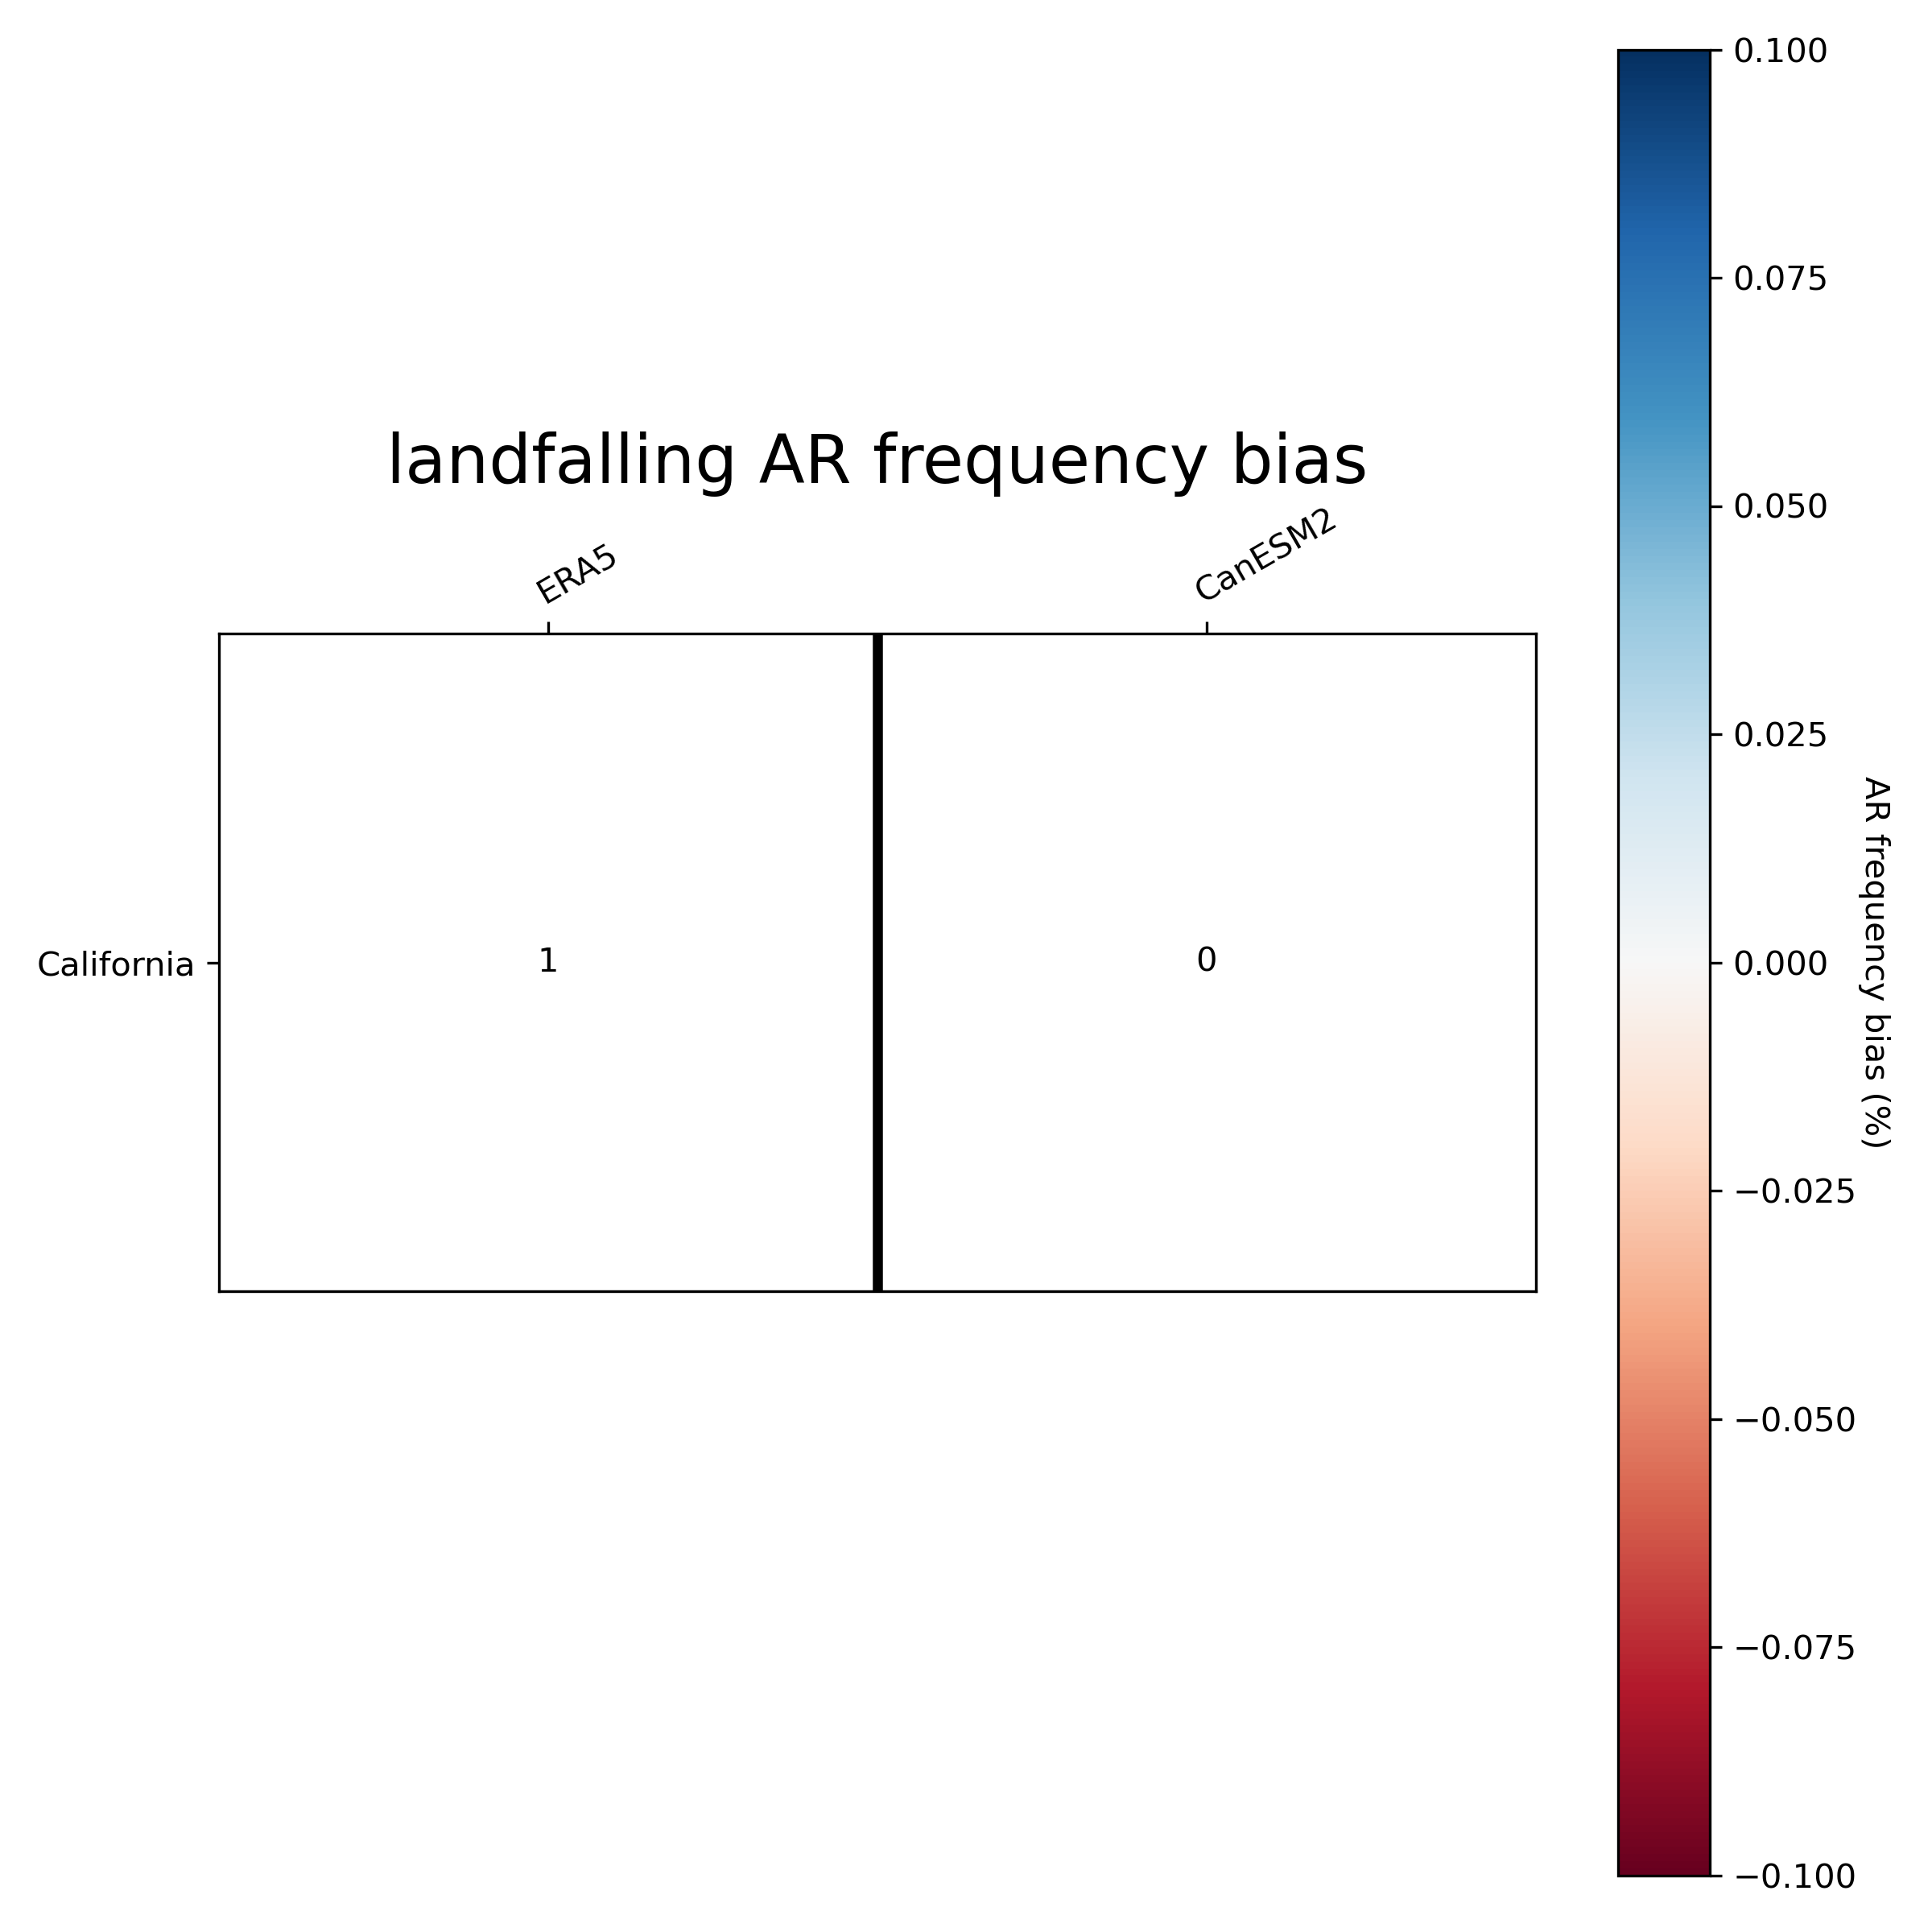

In [54]:
from IPython.display import Image

Image(filename = "../figure/AR_freq_bias.png")

### Optional for diagnostic plot, e.g, AR counts histogram

In [42]:
%%bash
python ../graphics/histogram_peak_day.py

Job starts!


In [43]:
!ls ../figure

AR_freq_bias.png
AR_peak_day_bias.png
AR_spatial_corr.png
histogram_AR_count_CanESM2_California_Mundhenk_NDJFM.png
histogram_AR_count_CanESM2_California_Mundhenk_annual.png
histogram_AR_count_ERA5_California_Mundhenk_NDJFM.png
histogram_AR_count_ERA5_California_Mundhenk_annual.png
map_freq_CanESM2_California_Mundhenk_annual.png


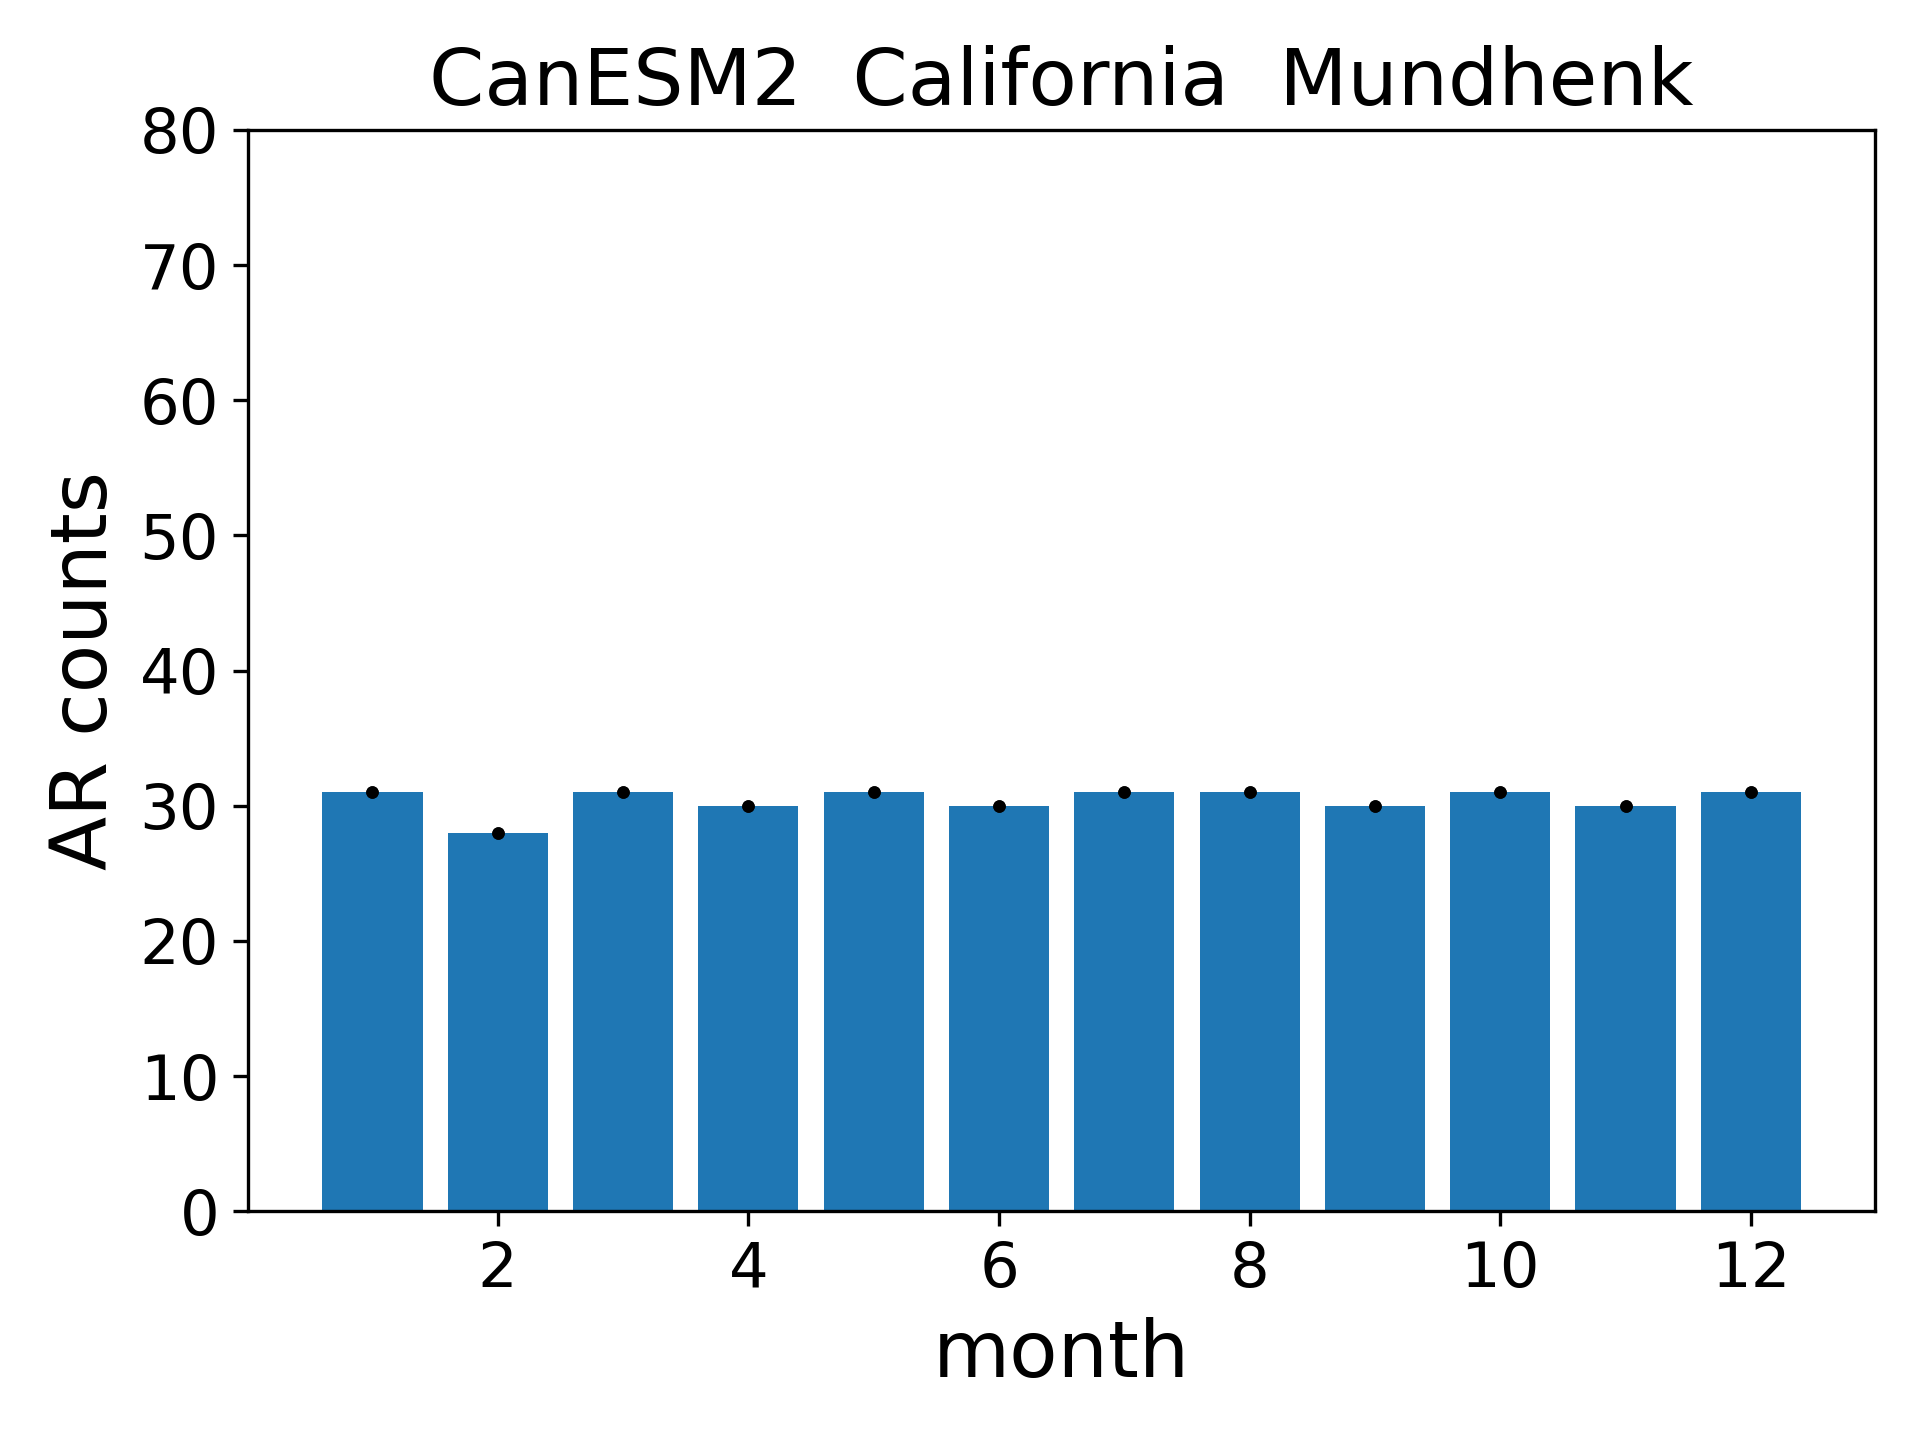

In [44]:
Image(filename = "../figure/histogram_AR_count_CanESM2_California_Mundhenk_NDJFM.png")